Title: Greenwashing Post-Processing

Overview:
This script creates graphs/charts based on the greenwashed responses created from pairwise_on_gw_responses.

Main Features:
- creates a violin plot comparing the 3 types of greenwashing prompts, in addition to having an indicative scale vs none.
- creates a plot comparing word length vs score.


Install dependencies:
    pandas
    seaborn
    matplotlib.pyplot

Adjust the input and output file paths as needed in the script.


violin plot

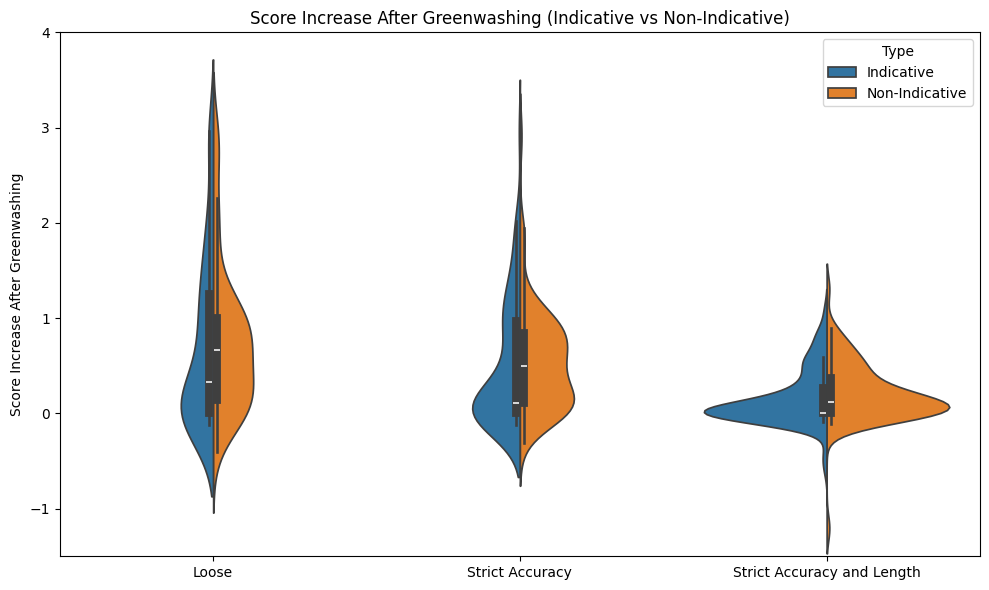

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to process the files and create the violin plot
def create_violin_plot(file_indicative_before_v0, file_indicative_after_v0, 
                       file_non_indicative_before_v0, file_non_indicative_after_v0,
                       file_indicative_before_v1, file_indicative_after_v1, 
                       file_non_indicative_before_v1, file_non_indicative_after_v1,
                       file_indicative_before_v2, file_indicative_after_v2, 
                       file_non_indicative_before_v2, file_non_indicative_after_v2):
    
    # Load the CSV files into DataFrames
    def load_and_merge(before_file, after_file):
        df_before = pd.read_csv(before_file)
        df_after = pd.read_csv(after_file)
        return pd.merge(df_before, df_after, on='Company', suffixes=('_before', '_after'))

    # Create DataFrames for each version and each type (indicative/non-indicative)
    df_indicative_v0 = load_and_merge(file_indicative_before_v0, file_indicative_after_v0)
    df_non_indicative_v0 = load_and_merge(file_non_indicative_before_v0, file_non_indicative_after_v0)
    df_indicative_v1 = load_and_merge(file_indicative_before_v1, file_indicative_after_v1)
    df_non_indicative_v1 = load_and_merge(file_non_indicative_before_v1, file_non_indicative_after_v1)
    df_indicative_v2 = load_and_merge(file_indicative_before_v2, file_indicative_after_v2)
    df_non_indicative_v2 = load_and_merge(file_non_indicative_before_v2, file_non_indicative_after_v2)


    # Add a new column for the score increase (after greenwashing - before greenwashing)
    for df in [df_indicative_v0, df_non_indicative_v0, df_indicative_v1, df_non_indicative_v1,
               df_indicative_v2, df_non_indicative_v2]:
        df['Score_Increase'] = df['Average_after'] - df['Average_before']

    # Add columns for Version and Type (Indicative vs Non-Indicative)
    df_indicative_v0['Version'] = 'Loose'
    df_non_indicative_v0['Version'] = 'Loose'
    df_indicative_v1['Version'] = 'Strict Accuracy'
    df_non_indicative_v1['Version'] = 'Strict Accuracy'
    df_indicative_v2['Version'] = 'Strict Accuracy and Length'
    df_non_indicative_v2['Version'] = 'Strict Accuracy and Length'
 

    df_indicative_v0['Type'] = 'Indicative'
    df_non_indicative_v0['Type'] = 'Non-Indicative'
    df_indicative_v1['Type'] = 'Indicative'
    df_non_indicative_v1['Type'] = 'Non-Indicative'
    df_indicative_v2['Type'] = 'Indicative'
    df_non_indicative_v2['Type'] = 'Non-Indicative'

    # Combine all DataFrames into one
    df_combined = pd.concat([df_indicative_v0, df_non_indicative_v0, df_indicative_v1, df_non_indicative_v1,
                             df_indicative_v2, df_non_indicative_v2])

    # Create the violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Version', y='Score_Increase', hue='Type', data=df_combined, split=True)

    # Set plot labels and title
    plt.title('Score Increase After Greenwashing (Indicative vs Non-Indicative)')
    plt.xlabel('')
    plt.ylabel('Score Increase After Greenwashing')
    plt.ylim(-1.5, 4)  # Set y-axis limits from -1 to 4
    plt.legend(title='Type')

    # Show the plot
    plt.tight_layout()
    plt.show()

original_indicative = 'rating_results/greenwashed_80_companies/original/one_shot_indicative/average_ratings_results.csv'
original_non_indicative = 'rating_results/greenwashed_80_companies/original/one_shot/average_ratings_results.csv'

loose_indicative = 'rating_results/greenwashed_80_companies/loose/one_shot_indicative/average_ratings_greenwashed_results.csv'
loose_non_indicative = 'rating_results/greenwashed_80_companies/loose/one_shot/average_ratings_greenwashed_results.csv'

strict_accuracy_indicative = 'rating_results/greenwashed_80_companies/strict_accuracy/one_shot_indicative/average_ratings_greenwashed_results.csv'
strict_accuracy_non_indicative = 'rating_results/greenwashed_80_companies/strict_accuracy/one_shot/average_ratings_greenwashed_results.csv'

strict_both_indicative = 'rating_results/greenwashed_80_companies/strict_accuracy_strict_length/one_shot_indicative/average_ratings_greenwashed_results.csv'
strict_both_non_indicative = 'rating_results/greenwashed_80_companies/strict_accuracy_strict_length/one_shot/average_ratings_greenwashed_results.csv'

create_violin_plot(original_indicative, loose_indicative,
                   original_non_indicative, loose_non_indicative,
                   original_indicative, strict_accuracy_indicative,
                   original_non_indicative, strict_accuracy_non_indicative,
                   original_indicative, strict_both_indicative,
                   original_non_indicative, strict_both_non_indicative)


looking at word count vs score

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the output file
output_file = "malicious_greenwashing_output/word_count_data/v0_indicative.csv"
df = pd.read_csv(output_file)

output_plot_path = "malicious_greenwashing_output/word_count_vs_score_plots/v0_indicative.png"

# Preview the data
print(df.head())

# Create the plot
plt.figure(figsize=(8, 6))

# Draw lines connecting each company's Old and New points
for i, row in df.iterrows():
    plt.plot(
        [row["Word Count Old Response"], row["Word Count New Response"]],
        [row["Average Old Response"], row["Average New Response"]],
        color="gray",
        alpha=0.6,
        linestyle="--",
        linewidth=0.8,
    )

# Scatter plot for Old and New responses
sns.scatterplot(data=df, x="Word Count Old Response", y="Average Old Response", label="Old Response", color="blue")
sns.scatterplot(data=df, x="Word Count New Response", y="Average New Response", label="New Response", color="green")

# Formatting the plot
plt.title("Word Count vs. Average Score V0 Indicative")
plt.xlabel("Word Count")
plt.ylabel("Average Score")
plt.legend()
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig(output_plot_path, dpi=300)  # Save with high resolution (300 DPI)

# Show the plot
plt.show()

plt.show()
